<a href='http://moncoachdata.com'><img src= 'https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/MonCoachData.jpg' width=400/></a>


---


<center><em>Copyright MonCoachData (tous droits réservés)</em></center>
<center><em>Pour plus d'informations, visitez notre site <a href='http://moncoachdata.com'>moncoachdata.com</a></em></center>



---

# Exploration des machines à vecteurs de support (SVM)

**NOTE : Pour cet exemple, nous allons explorer l'algorithme, donc nous allons sauter la mise à l'échelle (scaling) et également sauter le fractionnement Entraînement / Test et plutôt voir comment les différents paramètres peuvent changer un SVM (plus facile de visualiser les effets dans la classification).**

[Lien vers un excellent article sur les SVM](http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=4448154647BC7B10C991CEF2236BBA38?doi=10.1.1.114.4288&rep=rep1&type=pdf)
* Un tutoriel sur la régression par vecteurs de support par ALEX J. SMOLA et BERNHARD SCHOLKOPF

## SVM - Classification

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Données

Les données présentées ici simulent une étude médicale dans laquelle des souris infectées par un virus ont reçu différentes doses de deux médicaments, puis ont été contrôlées deux semaines plus tard pour voir si elles étaient toujours infectées. À partir de ces données, notre objectif est de créer un modèle de classification qui prédit (à partir de deux mesures de dosage) si la souris sera toujours infectée par le virus.

Vous remarquerez que les groupes sont très séparables, ceci est fait exprès pour explorer le comportement des différents paramètres d'un modèle SVM.

In [ ]:
df = pd.read_csv("mouse_viral_study.csv")

In [ ]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [ ]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

### Classes

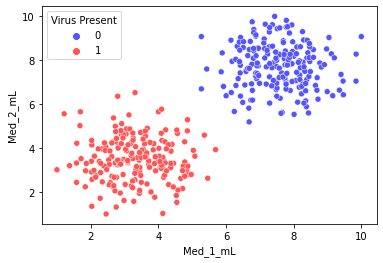

In [ ]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',
                data=df,palette='seismic');

### Hyperplan de séparation

Notre objectif avec les SVM est de créer le meilleur hyperplan de séparation. En 2 dimensions, il s'agit simplement d'une droite.

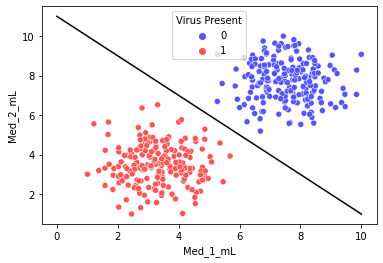

In [ ]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',palette='seismic',data=df)

# We want to somehow automatically create a separating hyperplane ( a line in 2D)

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'k');

## SVM - Support Vector Machine

In [ ]:
from sklearn.svm import SVC # Supprt Vector Classifier

In [ ]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

**NOTE : pour cet exemple, nous allons explorer l'algorithme, donc nous ne ferons pas de mise à l'échelle ni même de répartition train/test pour le moment.**

In [ ]:
y = df['Virus Present']
X = df.drop('Virus Present',axis=1)

In [ ]:
model = SVC(kernel='linear', C=1000)
model.fit(X.values, y)

SVC(C=1000, kernel='linear')

In [ ]:
# Ceci est importé du fichier .py supplémentaire
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
from svm_margin_plot import plot_svm_boundary

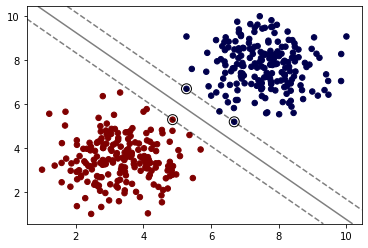

In [ ]:
plot_svm_boundary(model,X,y)

### Hyper Paramètres

### C

Paramètre de régularisation. La force de la régularisation est **inversement** proportionnelle à C. Doit être strictement positif. La pénalité est une pénalité l2 au carré.

*Remarque : si vous suivez les équations, en particulier la valeur de C telle que décrite dans l'ISLR, C dans scikit-learn est **inversement** proportionnelle à cette valeur.*

In [ ]:
model = SVC(kernel='linear', C=0.05)
model.fit(X.values, y)

SVC(C=0.05, kernel='linear')

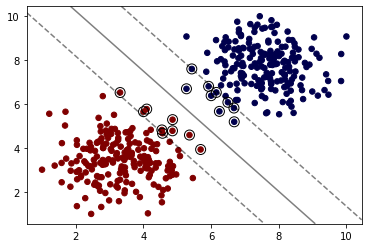

In [ ]:
plot_svm_boundary(model,X,y)

### Kernel (noyau)

[Choix du Kernel](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)

Lors de l'entraînement d'un SVM avec le Kernel RBF (Radial Basis Function), deux paramètres doivent être pris en compte : C et gamma. Le paramètre C, commun à tous les noyaux SVM, permet d'arbitrer entre les erreurs de classification des exemples d'entraînement et la simplicité de la surface de décision. Un C faible rend la surface de décision lisse, tandis qu'un C élevé vise à classer correctement tous les exemples d'apprentissage. gamma définit l'influence d'un seul exemple d'apprentissage. Plus gamma est grand, plus les autres exemples doivent être proches pour être affectés.

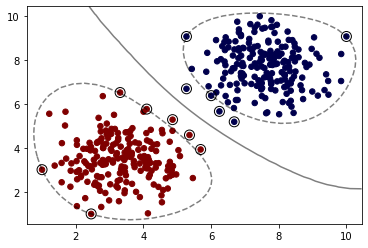

In [ ]:
model = SVC(kernel='rbf', C=1)
model.fit(X.values, y)
plot_svm_boundary(model,X,y)

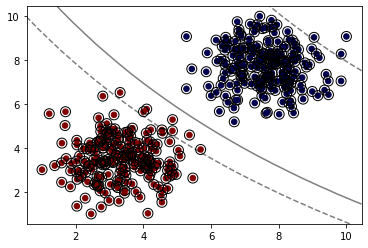

In [ ]:
model = SVC(kernel='sigmoid')
model.fit(X.values, y)
plot_svm_boundary(model,X,y)

#### degree (uniquement pour les kernels poly)

Degré de la fonction noyau polynomiale ('poly').
Ignoré par tous les autres noyaux.

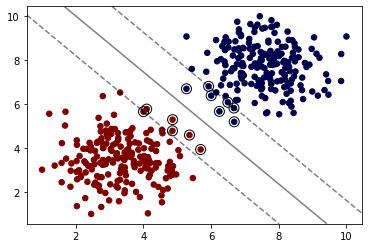

In [ ]:
model = SVC(kernel='poly', C=1, degree=1)
model.fit(X.values, y)
plot_svm_boundary(model,X,y)

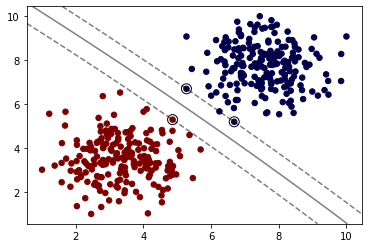

In [ ]:
model = SVC(kernel='poly', C=1, degree=2)
model.fit(X.values, y)
plot_svm_boundary(model,X,y)

### gamma

gamma : {'scale', 'auto'} or float, default='scale'
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

    - if ``gamma='scale'`` (default) is passed then it uses
      1 / (n_features * X.var()) as value of gamma,
    - if 'auto', uses 1 / n_features.

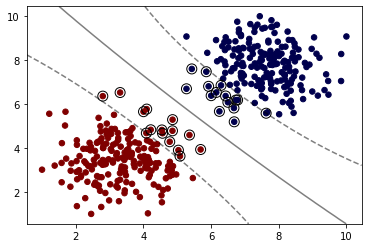

In [ ]:
model = SVC(kernel='rbf', C=1, gamma=0.01)
model.fit(X.values, y)
plot_svm_boundary(model,X,y)

## Grid Search

Gardez à l'esprit que, pour cet exemple simple, nous avons vu que les classes étaient facilement séparées, ce qui signifie que chaque variation du modèle pourrait facilement obtenir une précision de 100 %, ce qui signifie qu'une recherche sur grille (Grid Search) est "inutile".

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [ ]:
# Notez encore une fois que nous n'avons pas fait de répartition Train|Test
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [ ]:
# 100% accuracy (comme prévu)
grid.best_score_

1.0

In [ ]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

Il s'agit plutôt d'examiner le processus de Grid Search, pour se rappeler que dans une situation réelle telle que votre exercice, vous effectuerez une répartition train|test et obtiendrez des metrics d'évaluation finales.